In [1]:
# Importing required python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Defining path and reading the dataset
path = 'tracks.csv'
tracks_df = pd.read_csv(path)

In [3]:
# Preview of our dataset
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,3EEv9UCeZdn4MVFv8tsO1E,The structure of the so-called life,3,5621218,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],7/28/1979,0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3
1,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],6/5/2013,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0
2,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits,0,5042185,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],12/19/2014,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4
3,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],1/1/2010,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3
4,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018,0,4864333,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],12/16/2018,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4


In [4]:
# Information about the dataset
tracks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [5]:
# Number of rows and columns in our dataset
print(f"Our dataset contains - \n{tracks_df.shape[0]} rows and {tracks_df.shape[1]} columns")

Our dataset contains - 
586672 rows and 20 columns


In [6]:
# Checking null values in all columns
pd.isnull(tracks_df).sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

## Checking for duplicate rows based on all columns

In [7]:
# tracks_df[tracks_df.duplicated()]
# It can't be checked directly since id column's value is different in every row

In [8]:
# Columns for checking duplicate rows
column_check = ['name', 'popularity','duration_ms', 'explicit', 
                'artists', 'id_artists', 'release_date','danceability',
                'energy','key', 'loudness', 'mode', 'speechiness', 
                'acousticness', 'instrumentalness', 'liveness',	
                'valence',	'tempo', 'time_signature']

In [9]:
# Checking duplicate rows
duplicate_rows = tracks_df[tracks_df.duplicated(subset= column_check, keep ='first')]
print(duplicate_rows)
print(f"\nThere are {duplicate_rows.shape[0]} duplicate rows in our dataset")

                            id  \
58      1sh5yVOKTLip33bm1hOLAP   
799     1laPqqF9oKuGtcXApspWPn   
830     2oxZ6KbavToosKKbNvBmu1   
1455    3t3BGWFSQRRKUY1CPZxeHf   
1714    0YiiDoNYTQBlR5G43Ok40A   
...                        ...   
586666  2fKnluaRpiiCFHWwKFkIgN   
586667  1JUFU8XJRWgG9Ir8KlLvpW   
586669  4WeyR22Ax2fF9dY0NxgjFV   
586670  4SjlyAejCNUB4MrGM1KuVp   
586671  2s6e7KLoQ5hie3Cnh73v2v   

                                                     name  popularity  \
58              MINIMAL NEW YEAR 2017 - Continuous DJ Mix           0   
799     Violin Concerto in D Major, Op. 61: I. Allegro...           0   
830                         Interview with William Kapell           0   
1455    Symphony No. 4 in G Major: III. Ruhevoll, poco...           0   
1714    Piano Concerto No. 2 in B-Flat Major, Op. 83: ...           0   
...                                                   ...         ...   
586666                                        Pause Track           0   
586667 

### Removing duplicate rows

In [10]:
tracks_df.drop_duplicates(subset=column_check ,keep = 'first', inplace = True)

In [11]:
print(f'Now our dataframe is left with {tracks_df.shape[0]} rows after removing duplicate rows')

Now our dataframe is left with 585219 rows after removing duplicate rows


### Creating ***duration_second*** column and removing ***duration_ms*** column

In [12]:
# Creating duration_seconds columns
tracks_df['duration_seconds'] = (tracks_df['duration_ms'] /1000).round(decimals=0).astype('int')

# Removing duration_ms column
tracks_df.drop(['duration_ms'], axis=1, inplace= True)

In [13]:
tracks_df.head(5)              

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_seconds
0,3EEv9UCeZdn4MVFv8tsO1E,The structure of the so-called life,3,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],7/28/1979,0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3,5621
1,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],6/5/2013,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0,5404
2,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits,0,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],12/19/2014,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4,5042
3,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],1/1/2010,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3,4995
4,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018,0,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],12/16/2018,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4,4864


### Sorting the dataset on basis of popularity

In [14]:
sort_spotify = tracks_df.sort_values('popularity', ascending = False)

#### Top 10 most and least popular songs & their artists

<AxesSubplot: xlabel='name'>

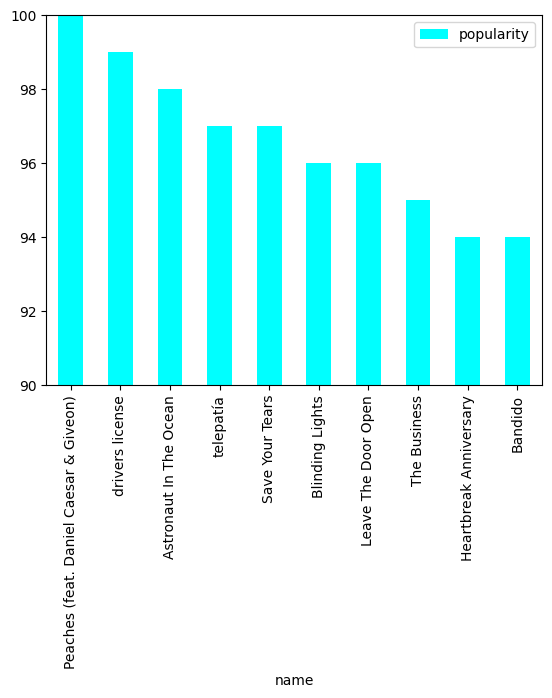

In [15]:
# Top 10 most popular songs and their artists
most_popular = sort_spotify[['id_artists','name','artists', 'popularity']].head(10)
most_popular.plot(ylim= [90,100], kind = 'bar', color = 'cyan',x = 'name')

In [16]:
# Top 10 least popular songs and their artists
least_popular = sort_spotify[['name', 'artists','popularity']].tail(10)
least_popular

,name,artists,popularity
544071,"Le sacre du printemps (1947 version): Pt. 1 ""A...","['Igor Stravinsky', 'Pierre Boulez', 'Clevelan...",0
393352,In The Bleak Midwinter,['Christmas 2018'],0
544074,"Verdi : Il trovatore : Part 2 - La Gitana ""Per...","['Giuseppe Verdi', 'Fernando Previtali', 'Orch...",0
393348,Jab Badal Ghir Ghir Aayenge,"['Suraiya', 'Mukesh']",0
544076,Beau Soir - (1/10/1944),['Jascha Heifetz'],0
393325,Hasrat Hai Yehi Mar Jaye Kahin,['Uma Devi'],0
393295,Kristallo,['Giorgos Papasideris'],0
544086,"Sonata No. 2 ""Poème mystique"": Più lento ""Glor...","['Ernest Bloch', 'Jascha Heifetz']",0
393253,My Last Affair,['Mildred Bailey'],0
586668,Pause Track,['Louis Armstrong'],0


In [17]:
# Number of songs with popularity 0
not_popular = tracks_df[tracks_df['popularity'] == 0]
print(f" There are {not_popular.shape[0]} songs that have 0 popularity")

 There are 43586 songs that have 0 popularity


### Sorting the dataset on the basis of song duration 


In [18]:
long_song = tracks_df.sort_values('duration_seconds', ascending = False)
long_song

,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_seconds
0,3EEv9UCeZdn4MVFv8tsO1E,The structure of the so-called life,3,0,['ท่านพุทธทาส'],['2ySk9zib3PuomvMGmCqdTA'],7/28/1979,0.638,0.537000,8,-13.365,1,0.7750,0.82500,0.00000,0.345,0.401,131.446,3,5621
1,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],6/5/2013,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0,5404
2,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits,0,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],12/19/2014,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4,5042
3,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],1/1/2010,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3,4995
4,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018,0,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],12/16/2018,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4,4864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586653,3RNVzA6VcMkIii2Gn0vFq6,Hear It Grow,0,0,['Underground Sound Of Lisbon'],['1KLufL4OUQFuzqaD3hSQ5u'],2/26/1998,0.000,0.327000,1,-25.776,1,0.0000,0.10500,0.00000,0.000,0.000,0.000,0,6
586658,0hr9kRUi2X4MXc72A4VxG4,Pause Track,0,0,['Sarah Vaughan'],['1bgyxtWjZwA5PQlDsvs9b8'],1949,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0,5
586659,00TfxQ0wUMHrHoXQsyY1O4,The Shortest Message (2015),0,1,"['Todd Glass', 'Blake Wexler']","['3aiC120kJreSUV17GecXwP', '19boQkDEIay9GaVAWk...",1/12/2018,0.000,0.642000,7,-8.020,1,0.0000,0.95500,0.00000,0.000,0.000,0.000,0,5
586660,7nZNkbxnRyx1DqPC6ro6Je,Pause Track,0,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0,4


#### Top 10 longest and shortest songs & their artists

<AxesSubplot: xlabel='name'>

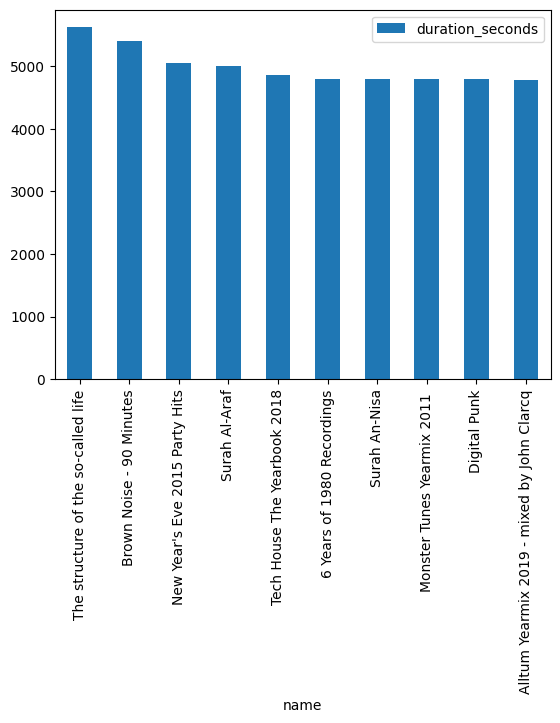

In [19]:
# Top 10 longest songs and their artists
long_song[['name','artists','duration_seconds']].head(10).plot(kind= 'bar', x = 'name')

In [20]:
# Top 10 shortest songs and their artists
long_song[['name', 'artists','duration_seconds']].tail(10)

,name,artists,duration_seconds
586655,Pause Track - Live,['Benny Goodman'],6
586657,Pause Track - Live,['Benny Goodman'],6
586656,Kashmir - Live 2019,['The Dark Tenor'],6
586652,Spectacle - Live 2019,['The Dark Tenor'],6
586654,Hear it grow,['Underground Sound Of Lisbon'],6
586653,Hear It Grow,['Underground Sound Of Lisbon'],6
586658,Pause Track,['Sarah Vaughan'],5
586659,The Shortest Message (2015),"['Todd Glass', 'Blake Wexler']",5
586660,Pause Track,['Louis Armstrong'],4
586668,Pause Track,['Louis Armstrong'],3


### Sorting the dataset on the basis of their release_date to find out oldest and newest songs

In [21]:
# 10 oldest songs and their artists
oldest_song = tracks_df.sort_values('release_date')
oldest_song[['name', 'artists','release_date']].head(10)

,name,artists,release_date
229192,Maldita sea la primera vez,['Los Pincheira del Sur'],1/1/1900
426451,Nobody Knows What a Red-Head Mama Can Do,['George Olsen'],1/1/1924
435959,Why Couldn't It Be Poor Little Me,['George Olsen'],1/1/1924
444258,A New Kind of Man - With a New Kind of Love,['George Olsen'],1/1/1924
453723,The Slave of Love,['George Olsen'],1/1/1924
416372,He's the Hottest Man In Town,['George Olsen'],1/1/1924
453999,Row! Row! Rosie,['George Olsen'],1/1/1924
363788,The Prisoner's Song,['Vernon Dalhart'],1/1/1924
402365,You'll Never Get to Heaven with Those Eyes,['George Olsen'],1/1/1924
413714,Biminy,['George Olsen'],1/1/1924


In [22]:
# 10 newest songs and their artists
newest_song = tracks_df.sort_values('release_date', ascending = False)
newest_song[['name', 'artists','release_date']].head(10)

,name,artists,release_date
17676,ואלס להגנת הצומח,"['Jane Bordeaux', 'Aya Zahavi Feiglin']",9/9/2020
471540,"Chocolate (From ""Sangeetkaar"")",['Tony Kakkar'],9/9/2020
482049,Окей,['Tima Belorusskih'],9/9/2020
299245,Sang Rahiyo (feat. Ranveer Allahbadia),"['Jasleen Royal', 'Ujjwal Kashyap', 'Ranveer A...",9/9/2020
334859,朝陽,['Aimyon'],9/9/2020
414089,Theme from the Immortal,['G Tom Mac Aka Gerard McMahon'],9/9/2020
484484,Don't Stop Now,['Esneider Garcia'],9/9/2020
217495,שלח לי מלאך,['Eviatar Banai'],9/9/2020
46378,さよならの今日に,['Aimyon'],9/9/2020
63771,Orange,['Silly Fools'],9/9/2020


C:\Users\Aditya\AppData\Local\Temp\ipykernel_1704\406978980.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df = tracks_df.drop(['key','mode','explicit'], axis = 1).corr(method='pearson')


[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'danceability'),
 Text(2.5, 0, 'energy'),
 Text(3.5, 0, 'loudness'),
 Text(4.5, 0, 'speechiness'),
 Text(5.5, 0, 'acousticness'),
 Text(6.5, 0, 'instrumentalness'),
 Text(7.5, 0, 'liveness'),
 Text(8.5, 0, 'valence'),
 Text(9.5, 0, 'tempo'),
 Text(10.5, 0, 'time_signature'),
 Text(11.5, 0, 'duration_seconds')]

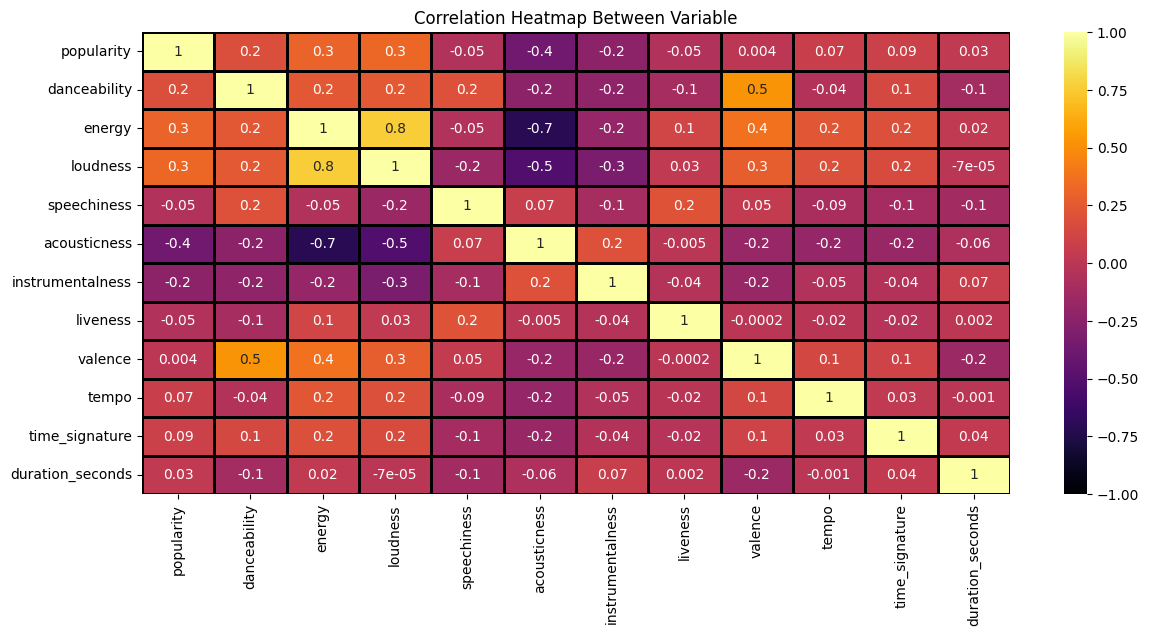

In [23]:
# Correlation heatmap
correlation_df = tracks_df.drop(['key','mode','explicit'], axis = 1).corr(method='pearson')
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(correlation_df, annot = True, fmt= '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'inferno', linewidths= 1, linecolor='Black')
heatmap.set_title("Correlation Heatmap Between Variable")
heatmap.set_xticklabels (heatmap.get_xticklabels())

### Top 10 Artists with most number of songs

In [24]:
artist = tracks_df.groupby('artists')['name'].count()

In [25]:
# 10 arists with most number of songs
top10 = artist.sort_values(ascending = False).head(10)
top10

artists
['Die drei ???']                              3856
['TKKG Retro-Archiv']                         2006
['Benjamin Blümchen']                         1502
['Bibi Blocksberg']                           1464
['Lata Mangeshkar']                           1371
['Bibi und Tina']                              916
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     905
['Francisco Canaro']                           891
['Ella Fitzgerald']                            870
['Tadeusz Dolega Mostowicz']                   838
Name: name, dtype: int64

<AxesSubplot: title={'center': 'Points Scored by Team'}, ylabel='name'>

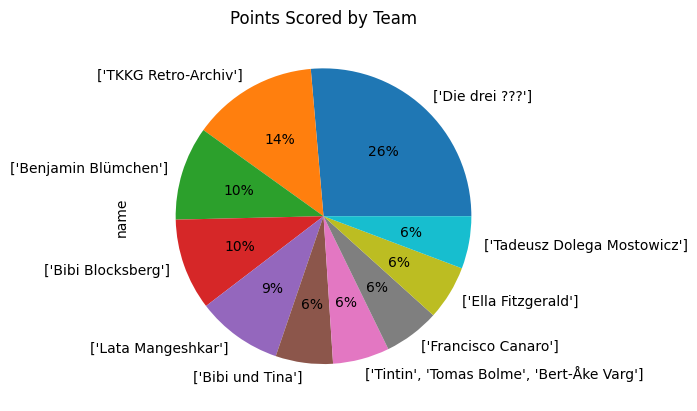

In [26]:
# Pie chart of 10 artists with most number of songs
top10.plot(kind='pie', autopct='%1.0f%%',title='Points Scored by Team')

### Creating bar graph for number of songs per year

In [27]:
dates = pd.to_datetime(tracks_df.release_date)
years = dates.dt.year

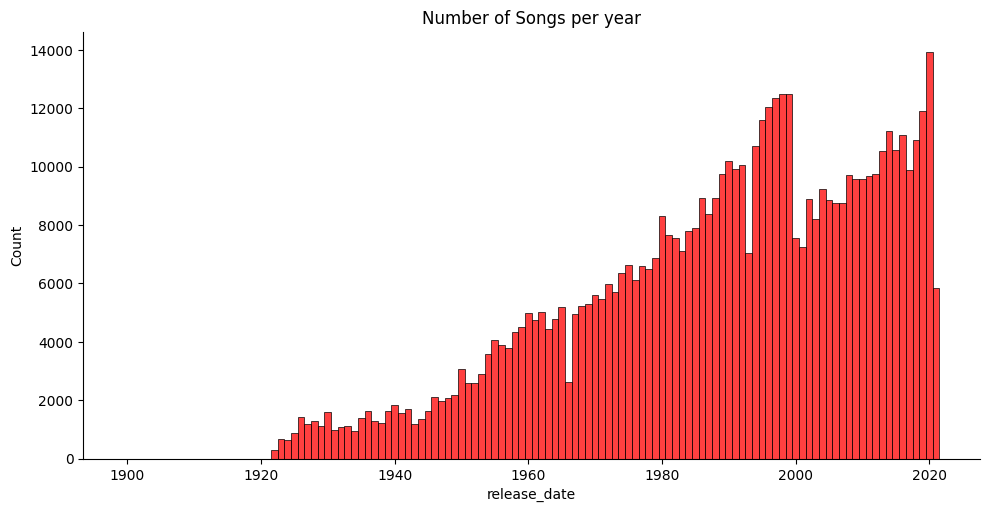

In [28]:
sns.displot(years, discrete = True, aspect = 2, height = 5, kind = 'hist', color = 'red').set(title = 'Number of Songs per year')

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1922'),
  Text(2, 0, '1923'),
  Text(3, 0, '1924'),
  Text(4, 0, '1925'),
  Text(5, 0, '1926'),
  Text(6, 0, '1927'),
  Text(7, 0, '1928'),
  Text(8, 0, '1929'),
  Text(9, 0, '1930'),
  Text(10, 0, '1931'),
  Text(11, 0, '1932'),
  Text(12, 0, '1933'),
  Text(13, 0, '1934'),
  Text(14, 0, '1935'),
  Text(15, 0, '1936'),
  Text(16, 0, '1937'),
  Text(17, 0, '1938'),
  Text(18, 0, '1939'),
  

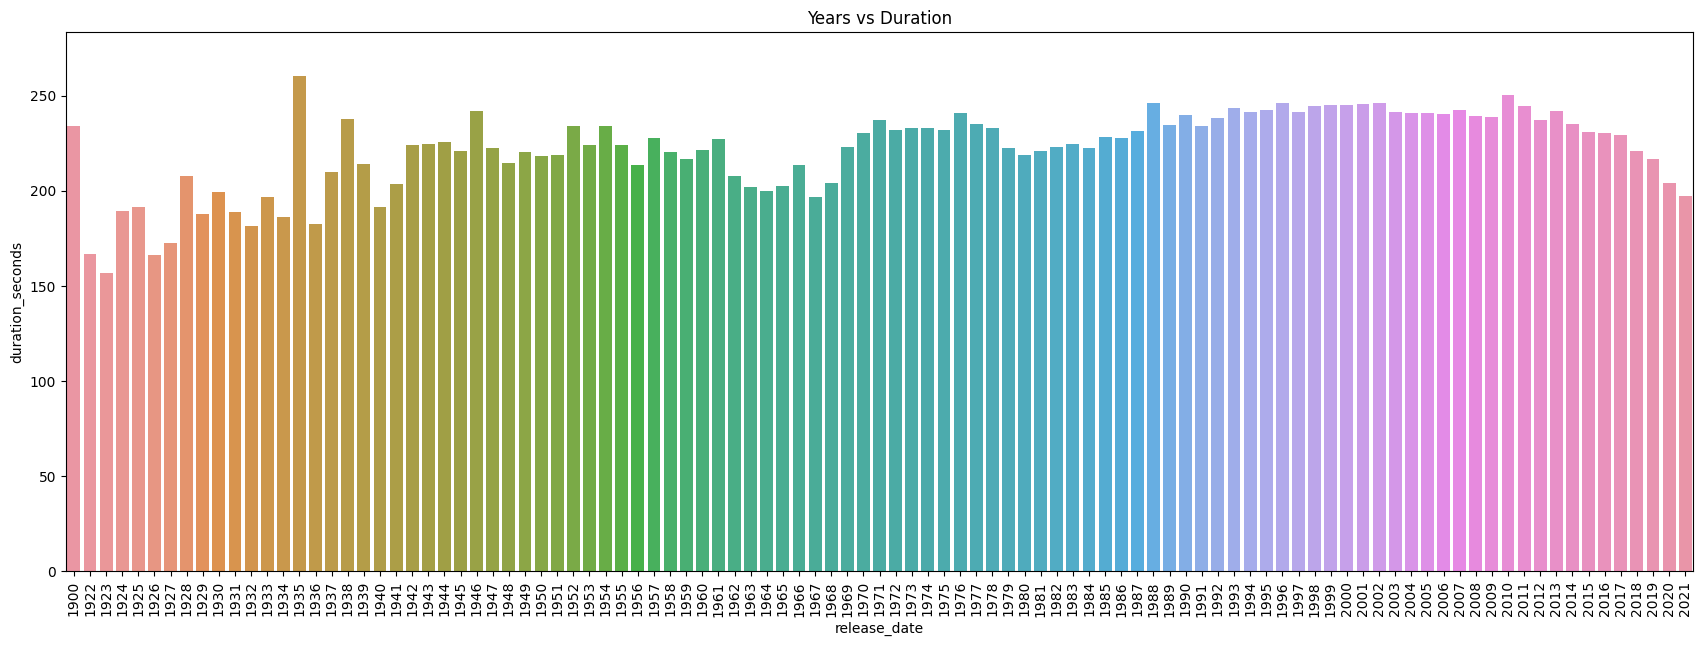

In [29]:
total_dr = tracks_df.duration_seconds
fig , ax  = plt.subplots(figsize = (21,7))
fig = sns.barplot(x = years, y = total_dr, ax = ax, errwidth= False).set(title = 'Years vs Duration')
plt.xticks(rotation = 90)

(array([1880., 1900., 1920., 1940., 1960., 1980., 2000., 2020., 2040.]),
 [Text(1880.0, 0, '1880'),
  Text(1900.0, 0, '1900'),
  Text(1920.0, 0, '1920'),
  Text(1940.0, 0, '1940'),
  Text(1960.0, 0, '1960'),
  Text(1980.0, 0, '1980'),
  Text(2000.0, 0, '2000'),
  Text(2020.0, 0, '2020'),
  Text(2040.0, 0, '2040')])

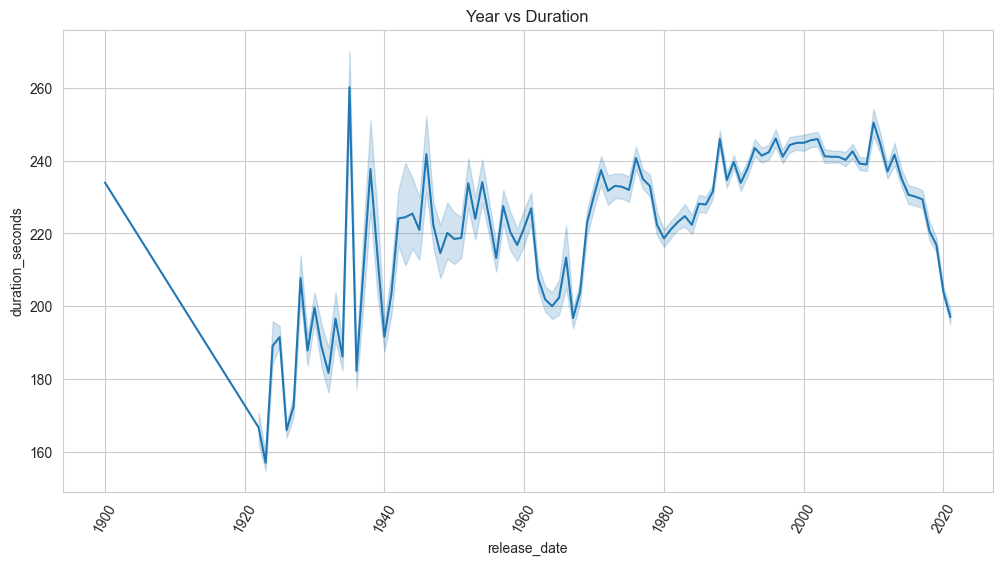

In [30]:
total_dr = tracks_df.duration_seconds
sns.set_style (style = 'whitegrid')
fig,ax = plt.subplots(figsize = (12,6))
fig = sns.lineplot (x = years, y = total_dr, ax = ax). set(title = 'Year vs Duration')
plt.xticks(rotation = 60)

## Loading and creating our second dataframe

In [31]:
path2 = 'SpotifyFeatures.csv'
spotify_df = pd.read_csv(path2)

### Creating ***duration_seconds*** column and removing ***duration_ms*** column

In [32]:
spotify_df['duration_seconds'] = (spotify_df['duration_ms']/1000).round(decimals= 0).astype(int)
spotify_df.drop('duration_ms', inplace = True, axis = 1)

In [33]:
# Preview of the dataframe
spotify_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_seconds
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,99
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,137
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,170
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,152
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,83


### Finding out number of songs per *Genre*

In [34]:
# Creating a genre list
genre_list = []
for g in spotify_df['genre']:
    genre_list.append(g)

In [35]:
# Using counter for counting the frequency of each genre
from collections import Counter
counts = dict(Counter(genre_list))
gen_dict = {key:value for key, value in counts.items() if value > 1}
print(gen_dict)

{'Movie': 7806, 'R&B': 8992, 'A Capella': 119, 'Alternative': 9263, 'Country': 8664, 'Dance': 8701, 'Electronic': 9377, 'Anime': 8936, 'Folk': 9299, 'Blues': 9023, 'Opera': 8280, 'Hip-Hop': 9295, "Children's Music": 5403, 'Children’s Music': 9353, 'Rap': 9232, 'Indie': 9543, 'Classical': 9256, 'Pop': 9386, 'Reggae': 8771, 'Reggaeton': 8927, 'Jazz': 9441, 'Rock': 9272, 'Ska': 8874, 'Comedy': 9681, 'Soul': 9089, 'Soundtrack': 9646, 'World': 9096}


In [36]:
# Creating list of genres and their frequencies
k = list(gen_dict.keys())# a list of the dict keys
v = list(gen_dict.values()) # a list of the dict values

In [37]:
# Creating a Dataframe using the two lists and then sorting it in decreasing order to find out the top 5 genres 
index = len(k)
genre_df = (pd.DataFrame(list(zip(k,v)), columns= ['genres', 'number_of_songs'])).sort_values('number_of_songs', ascending = False).head()
genre_df

,genres,number_of_songs
23,Comedy,9681
25,Soundtrack,9646
15,Indie,9543
20,Jazz,9441
17,Pop,9386


[Text(0.5, 1.0, 'Top 5 Genres by Number of songs')]

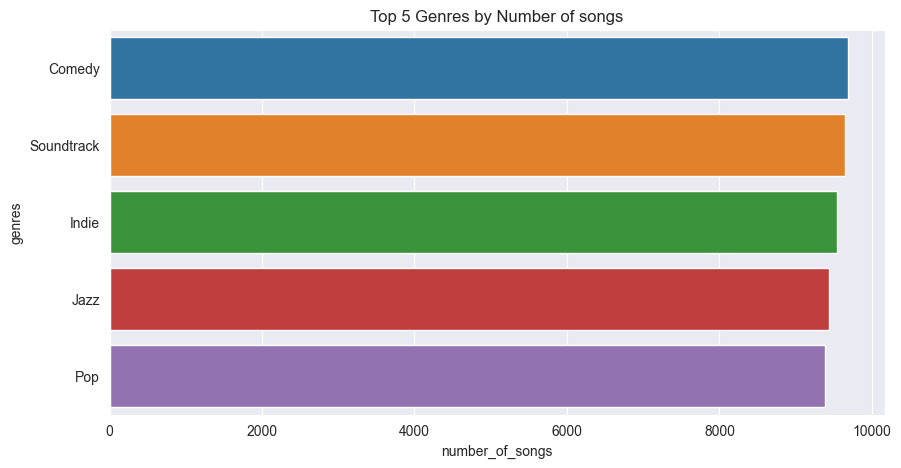

In [38]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(y = 'genres', x = 'number_of_songs', data = genre_df).set(title='Top 5 Genres by Number of songs')

### Creating a plot of song duration in different genres

Text(0, 0.5, 'Genres')

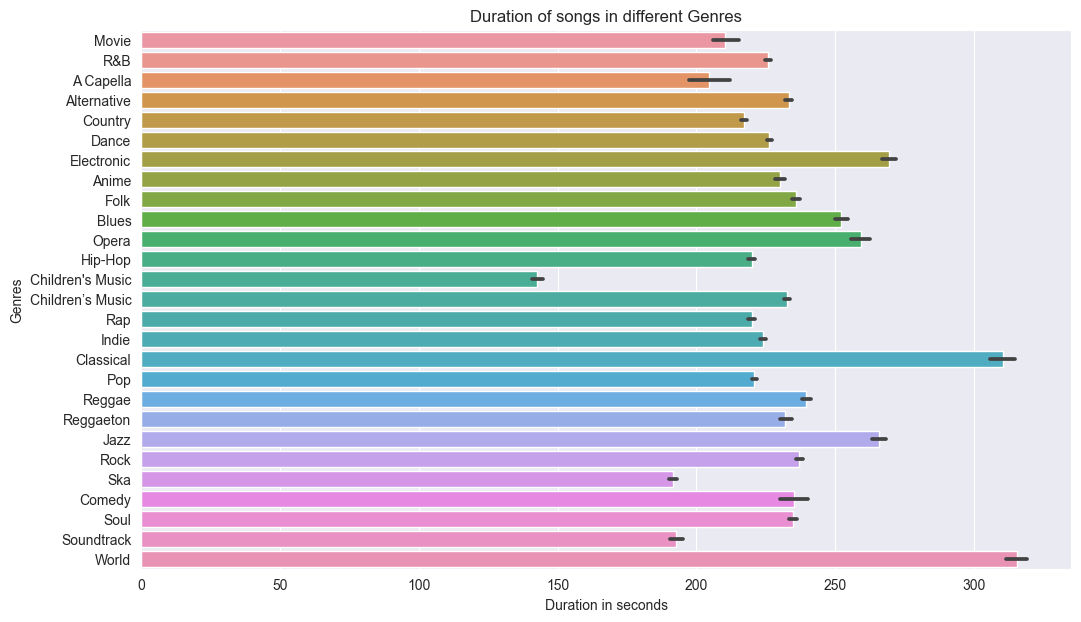

In [39]:
plt.figure(figsize = (12,7))
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='genre', x='duration_seconds', data=spotify_df)
plt.xlabel('Duration in seconds')
plt.ylabel('Genres')